In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [2]:
def unwrap(lst):
    ret = []
    for inLst in lst:
        ret.append(inLst[0])
    return ret

def fromSeriesToDF(df,series,IDX):
    series = df.iloc[IDX,:]
    dfSeries = series.to_frame()
    newdata = { 'ds':dfSeries.axes[0][1:].tolist(),'y':unwrap(dfSeries.values.tolist()[1:]) }
    newframe = pd.DataFrame(data=newdata)
    return newframe

def getTrainTest(df,sz,prc):
    proc = 100 - prc
    until = (proc * sz) // 100
    return df.iloc[:until],df.iloc[until:],until

def smape(actual,forecasted):
    if len(actual) != len(forecasted):
        raise Exception("Lists not equal")
    lst_size = len(actual)
    sum = 0
    for i in range(0,lst_size):
        sum += (np.absolute(forecasted[i] - actual[i]))/(np.absolute(forecasted[i]) + np.absolute(actual[i]))
    return sum / lst_size

In [3]:
def doForSeries(df,series,IDX,with_daily_seasonality = False,with_weekly_seasonality = False,with_yearly_seasonality = False):
    newdf = fromSeriesToDF(df,series,IDX).dropna()
    df_size = newdf.shape[0]
    train_df,test_df,until = getTrainTest(newdf,df_size,30)

    my_model = Prophet(interval_width=0.95,daily_seasonality=with_daily_seasonality,weekly_seasonality=with_weekly_seasonality,yearly_seasonality=with_yearly_seasonality)
    my_model.fit(train_df)
    future_dates = my_model.make_future_dataframe(periods=df_size-until)
    forecast = my_model.predict(future_dates)
    
    forecasted_values = unwrap(forecast[['yhat']].values.tolist()[until:])
    test_values = unwrap(test_df[['y']].values.tolist())
    return smape(test_values,forecasted_values)
    
def overlord(df,GO_UNTIL,with_daily_seasonality,with_weekly_seasonality,with_yearly_seasonality):
    ret = []
    for i in range(0,GO_UNTIL):
        try:
            ret.append(doForSeries(df,df.iloc[i],i,with_daily_seasonality,with_weekly_seasonality,with_yearly_seasonality))
        except BaseException:
            ret.append("NaN")
    return ret
        

In [4]:
def printListErrors(lst):
    for i in range(0,len(lst)):
        print(str(i+1) + " -> " + str(lst[i]))
        
def writeToFile(lst,filename):
    ln = len(lst)
    with open(filename,"w") as f:
        f.write(str(ln) + "\n")
        for nr in lst:
            f.write(str(nr) + "\n")

In [10]:
GO_UNTIL = 100
out_root = "OUT/"
df = pd.read_csv('train_1.csv')

#DAILY,WEEKLY,YEARLY
print("HERE 1")
lstTFT = overlord(df,GO_UNTIL,True,False,True)
writeToFile(lstTFT,out_root + "TFT.out")
print("HERE 2")
print("Done TFT")
lstTFF = overlord(df,GO_UNTIL,True,False,False)
writeToFile(lstTFF,out_root + "TFF.out")
print("Done TFF")
lstFFF = overlord(df,GO_UNTIL,False,False,False)
writeToFile(lstFFF,out_root + "FFF.out")
print("Done FFF")
lstFFT = overlord(df,GO_UNTIL,False,False,True)
writeToFile(lstFFT,out_root + "FFT.out")
print("Done FFT")
lstFTF = overlord(df,GO_UNTIL,False,True,False)
writeToFile(lstFTF,out_root + "FTF.out")
print("Done FTF")

HERE 1


INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 15.0.


HERE 2
Done TFT


INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 15.0.


Done TFF


INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 15.0.


Done FFF


INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 15.0.


Done FFT


INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 15.0.


Done FTF


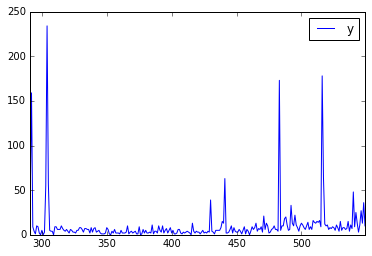

[0.26908892309902793, 0.29487430892843536]

In [6]:
row = fromSeriesToDF(df,df.iloc[4],4).dropna()
row.plot()
plt.show()
lstTFT

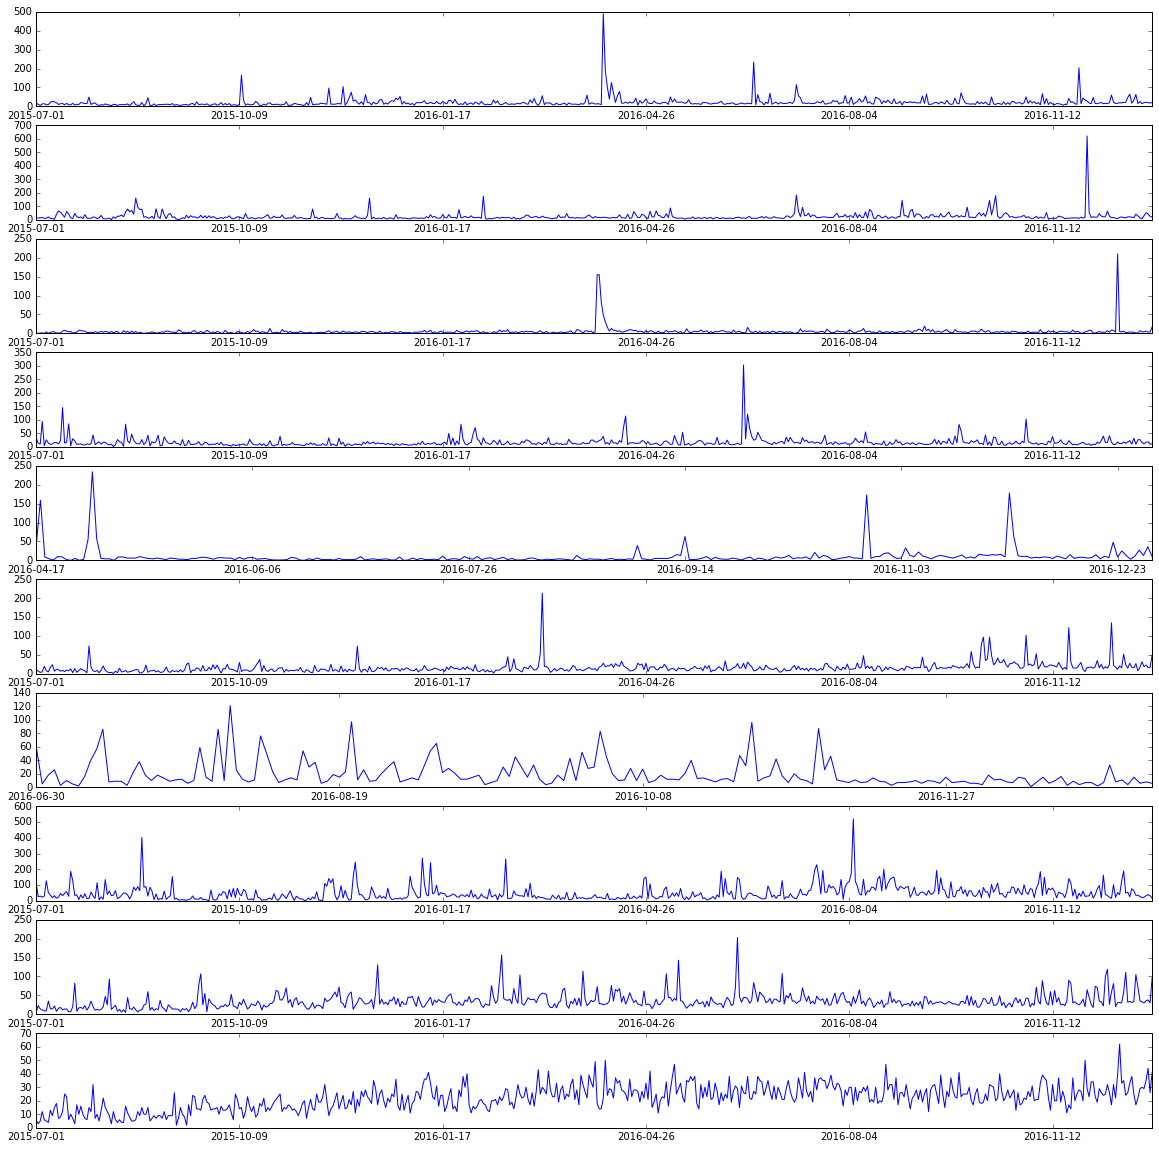

In [7]:
no_plots = 10
for i in range(0,no_plots):
    plt.subplot(no_plots,1,i+1)
    row = df.iloc[i][1:].dropna()
    row.plot(kind='line',figsize=(20,20))
plt.show()

In [8]:
df.shape

(145063, 551)

In [9]:
len(lstTFT)

2